In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [2]:
x = np.arange(0., 110., 10)

In [3]:
v = np.array([
    0,
    5.2,
    9.1,
    10.5,
    11.2,
    11.6,
    12.,
    11.8,
    11.6,
    11.4,
    11.2,
])

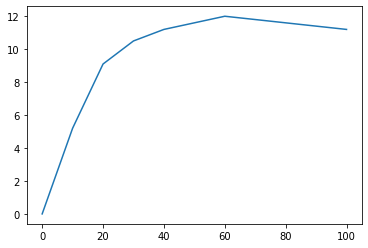

In [4]:
plt.plot(x, v)

So it looks like we can fit it piecewise, before and after 60m

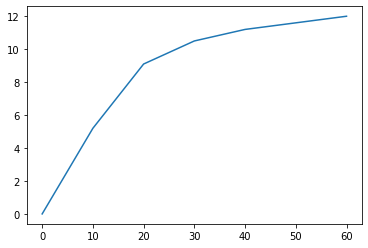

In [5]:
plt.plot(x[:7], v[:7])

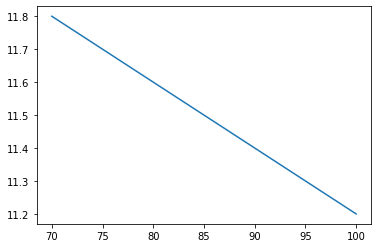

In [6]:
plt.plot(x[7:], v[7:])

<ipython-input-7-50ce60ac86b8>:1: RuntimeWarning: divide by zero encountered in power
  plt.plot(x, np.power(x, -2))


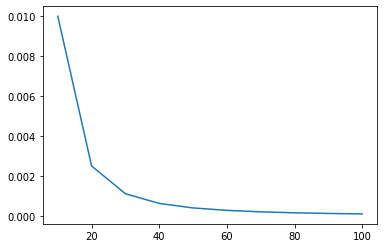

In [7]:
plt.plot(x, np.power(x, -2))

In [8]:
x1, v1 = x[:7], v[:7]
x2, v2 = x[7:], v[7:]

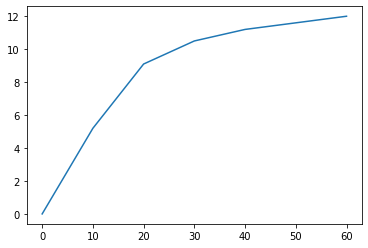

In [9]:
plt.plot(x1, v1)

In [10]:
def f(x, b):
    return 12 - 12 / np.exp(b * x)

In [11]:
curve_fit(f, x1, v1)

<ipython-input-10-0b58376c4dd7>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 12 - 12 / np.exp(b * x)


(array([0.06571672]), array([[7.12375255e-06]]))

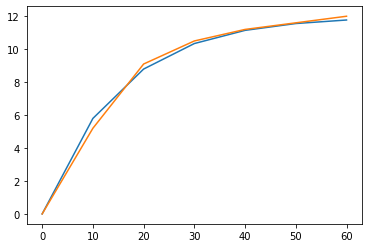

In [12]:
plt.plot(x1, f(x1, 0.066))
plt.plot(x1, v1)

In [13]:
def f(x, m, c):
    return m * x + c

In [14]:
curve_fit(f, x2, v2)

(array([-0.02, 13.2 ]),
 array([[ 3.15544362e-33, -2.68212705e-31],
        [-2.68212705e-31,  2.31925101e-29]]))

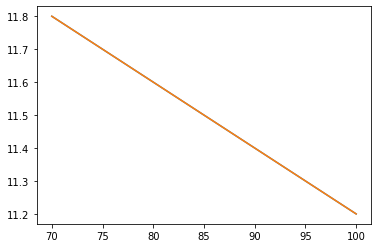

In [15]:
plt.plot(x2, f(x2, -0.02, 13.2))
plt.plot(x2, v2)

So the key points are:

before you hit $12ms^{-1}$, then this is the function:

$$
f(x) = \frac{12}{12 - e^{0.66}}
$$

After 12ms, you decay by $0.02ms^{-1}$ every $10m$